<a href="https://colab.research.google.com/github/matteol1/DeepLearning/blob/main/Sample_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural networks

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [46]:
class ModelNetwork1(nn.Module) :
  #Define a neural network with
  # in_features = 4 features as input
  # hidden layers h1 (8 neutons) and
  # h2 (6 neurons)
  # output 3 -> 3 classes of possible outputs
  def __init__(self, in_features=4, h1=8, h2=6, out_features=3):
    super().__init__() #Instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [47]:
#Pick a seed for randomization

torch.manual_seed(42)

In [48]:
#Instantiate model we defined above

model = ModelNetwork1()

# Sample dataset

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()
iris;

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
url= 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
mydata = pd.read_csv(url)

In [52]:
mydata.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [53]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
mydata.columns = attributes

In [54]:
mydata[80:85]

,sepal_length,sepal_width,petal_length,petal_width,class
80,5.5,2.4,3.7,1.0,Iris-versicolor
81,5.8,2.7,3.9,1.2,Iris-versicolor
82,6.0,2.7,5.1,1.6,Iris-versicolor
83,5.4,3.0,4.5,1.5,Iris-versicolor
84,6.0,3.4,4.5,1.6,Iris-versicolor


In [55]:
mydata['class'] = mydata['class'].replace('Iris-setosa',0.0)
mydata['class'] = mydata['class'].replace('Iris-versicolor',1.0)
mydata['class'] = mydata['class'].replace('Iris-virginica',2.0)

In [56]:
mydata[10:15]

,sepal_length,sepal_width,petal_length,petal_width,class
10,4.8,3.4,1.6,0.2,0.0
11,4.8,3.0,1.4,0.1,0.0
12,4.3,3.0,1.1,0.1,0.0
13,5.8,4.0,1.2,0.2,0.0
14,5.7,4.4,1.5,0.4,0.0


In [57]:
# Define features and predictions

x = mydata.drop('class', axis=1)
y = mydata['class']

In [58]:
X = x.values
y = y.values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
#Define train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [61]:
#Float Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#Long Integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [62]:
#Define criterion to measure error
crit = nn.CrossEntropyLoss()
#Define optimizer
# Adam
# lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)
#model parameters are fc1 fc2 (out)

In [63]:
#Define epochs
#how many full runs through the network
epochs = 150
losses = []

In [64]:
#Run for epochs
for i in range(epochs):
  #Forward
  y_pred = model.forward(X_train)

  #Measure error
  loss = crit(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f"Epoch: {i}, loss: {loss}")

  #Backward testing
  #Take error rate of forward propagation and feed it back into the network
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, loss: 1.2461832761764526
Epoch: 10, loss: 1.0289311408996582
Epoch: 20, loss: 0.8615467548370361
Epoch: 30, loss: 0.6794102787971497
Epoch: 40, loss: 0.601845383644104
Epoch: 50, loss: 0.5496537089347839
Epoch: 60, loss: 0.5064727663993835
Epoch: 70, loss: 0.46617281436920166
Epoch: 80, loss: 0.36295193433761597
Epoch: 90, loss: 0.29167190194129944
Epoch: 100, loss: 0.23186281323432922
Epoch: 110, loss: 0.1835448145866394
Epoch: 120, loss: 0.1492748111486435
Epoch: 130, loss: 0.12305007874965668
Epoch: 140, loss: 0.10463626682758331


(0.0, 1.4)

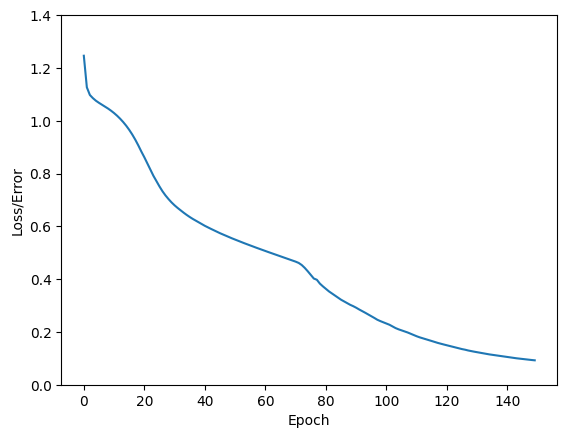

In [69]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")
plt.ylim(0,1.4)

In [67]:
print(losses[149])

0.09242937
